# I- data understanding

In [ ]:
#Importation des bibliothèques
import pandas as pd #pour la lecture de la dataset
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency, f_oneway
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from xgboost import XGBRegressor



In [ ]:
# Charger le dataset
data = pd.read_csv('/content/projet3.csv')  # il faut importer le dataset dans collab
data.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Exp Type
0,1,No,Air Miles,Letter,High,1.0,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0,NaN
1,2,No,Air Miles,Letter,Medium,1.0,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0,NaN
2,3,No,Air Miles,Postcard,High,2.0,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0,NaN
3,4,No,Air Miles,Letter,Medium,2.0,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0,NaN
4,5,No,Air Miles,Letter,Medium,1.0,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0,NaN


In [ ]:
data.shape

data.info() #identifie les types de colonnes, les valeurs manquantes
data.describe() #resumé des statistiques des colonnes numériques

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           16373 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  16324 non-null  float64
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            16333 non-null  float64
 15  Q3 Balance         

,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Exp Type
count,18000.000000,16324.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,16333.000000,17976.000000,17976.000000,1484.000000
mean,9000.500000,1.258821,1.903500,1.203444,3.499056,940.515562,910.450656,998.200269,1042.033600,810.185803,99.054582
std,5196.296758,0.473747,0.797009,0.427341,1.114182,350.297837,620.077060,457.984702,553.452599,559.001365,11.589884
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000,80.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,662.000000,633.000000,363.000000,89.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1029.000000,945.500000,703.000000,98.500000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000,109.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000,119.000000


In [ ]:
#découvrir les colonnes qui ont des valeurs nulles
missing_values = data.isnull().sum()
print(missing_values)

Customer Number             0
Offer Accepted              0
Reward                      0
Mailer Type              1627
Income Level                0
# Bank Accounts Open     1676
Overdraft Protection        0
Credit Rating               0
# Credit Cards Held         0
# Homes Owned               0
Household Size              0
Own Your Home               0
Average Balance            24
Q1 Balance                 24
Q2 Balance               1667
Q3 Balance                 24
Q4 Balance                 24
Exp Type                16516
dtype: int64


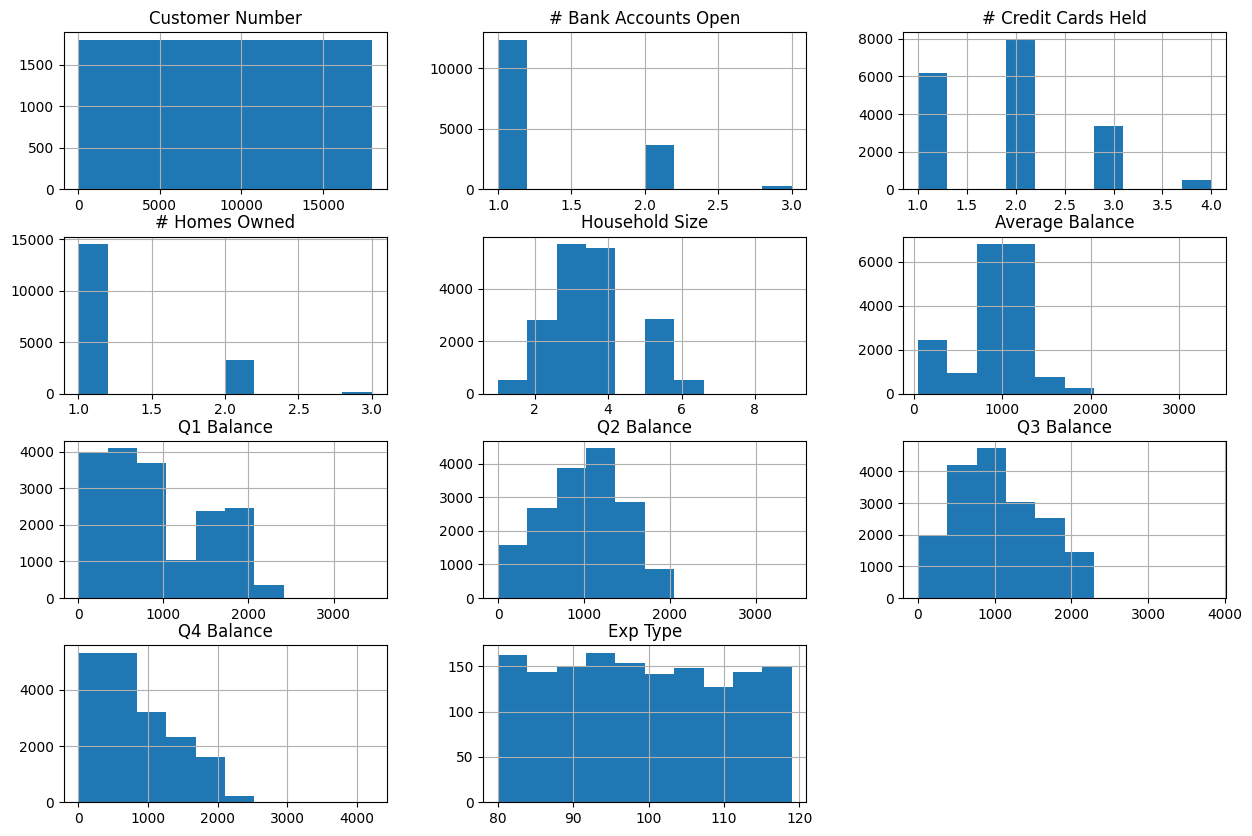

In [ ]:
# Histogrammes pour representer le comportements des données dans chaque colonne

data.hist(figsize=(15, 10))
plt.show()

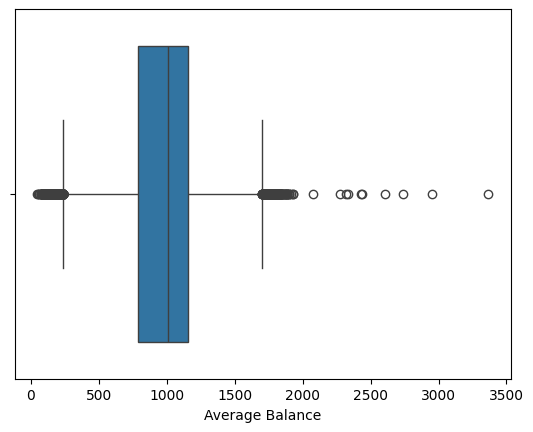

In [ ]:
# Boîte à moustaches pour détecter les valeurs extrêmes
sns.boxplot(data=data, x='Average Balance')
plt.show()

In [ ]:
print ("Customer Number	 = " ,data['Customer Number'].unique())
print ("-----------------------------------------------")
print ("Offer Accepted	 = " ,data['Offer Accepted'].unique())
print ("-----------------------------------------------")
print ("Reward = " ,data['Reward'].unique())
print ("-----------------------------------------------")
print ("Mailer Type	 = " ,data['Mailer Type'].unique())
print ("-----------------------------------------------")
print ("# Bank Accounts Open		 = " ,data['# Bank Accounts Open'].unique())
print ("-----------------------------------------------")
print ("Overdraft Protection		 = " ,data['Overdraft Protection'].unique())
print ("-----------------------------------------------")
print ("# Credit Cards Held	 = " ,data['# Credit Cards Held'].unique())
print ("-----------------------------------------------")
print ("# Homes Owned = " ,data['# Homes Owned'].unique())
print ("-----------------------------------------------")
print ("Household Size	 = " ,data['Household Size'].unique())
print ("-----------------------------------------------")
print ("Own Your Home		 = " ,data['Own Your Home'].unique())
print ("-----------------------------------------------")
print ("Average Balance		 = " ,data['Average Balance'].unique())
print ("-----------------------------------------------")
print ("Q1 Balance = " ,data['Q1 Balance'].unique())
print ("-----------------------------------------------")
print ("Q2 Balance = " ,data['Q2 Balance'].unique())
print ("-----------------------------------------------")
print ("Q3 Balance = " ,data['Q3 Balance'].unique())
print ("-----------------------------------------------")
print ("Q4 Balance = " ,data['Q4 Balance'].unique())
print ("-----------------------------------------------")
print ("Exp Type = " ,data['Exp Type'].unique())

Customer Number	 =  [    1     2     3 ... 17998 17999 18000]
-----------------------------------------------
Offer Accepted	 =  ['No' 'Yes']
-----------------------------------------------
Reward =  ['Air Miles' 'Cash Back' 'Points']
-----------------------------------------------
Mailer Type	 =  ['Letter' 'Postcard' nan]
-----------------------------------------------
# Bank Accounts Open		 =  [ 1.  2. nan  3.]
-----------------------------------------------
Overdraft Protection		 =  ['No' 'Yes']
-----------------------------------------------
# Credit Cards Held	 =  [2 1 3 4]
-----------------------------------------------
# Homes Owned =  [1 2 3]
-----------------------------------------------
Household Size	 =  [4 5 2 6 3 1 8 9]
-----------------------------------------------
Own Your Home		 =  ['No' 'Yes']
-----------------------------------------------
Average Balance		 =  [1160.75  147.25  276.5  ...  691.   1649.   1427.25]
-----------------------------------------------
Q1 Ba

### **II-DATA PREPARATION**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Sélectionner les colonnes catégorielles à encoder
categorical_columns = ['Offer Accepted', 'Reward', 'Mailer Type', 'Overdraft Protection', 'Income Level', 'Credit Rating',
                       'Own Your Home']

# Créer l'encodeur ordinal
encoder = OrdinalEncoder()

# Appliquer l'OrdinalEncoder aux colonnes catégorielles
data[categorical_columns] = encoder.fit_transform(data[categorical_columns])

# Afficher les premières lignes après transformation
data.head()


,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Exp Type
0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1,4,0.0,1160.75,1669.0,877.0,1095.0,1002.0,NaN
1,2,0.0,0.0,0.0,2.0,1.0,0.0,2.0,2,2,5,1.0,147.25,39.0,106.0,78.0,366.0,NaN
2,3,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2,1,2,1.0,276.50,367.0,352.0,145.0,242.0,NaN
3,4,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1,1,4,0.0,1219.00,1578.0,1760.0,1119.0,419.0,NaN
4,5,0.0,0.0,0.0,2.0,1.0,0.0,2.0,2,1,6,1.0,1211.00,2140.0,1357.0,982.0,365.0,NaN


In [ ]:
print ("Customer Number	 = " ,data['Customer Number'].unique())
print ("-----------------------------------------------")
print ("Offer Accepted	 = " ,data['Offer Accepted'].unique())
print ("-----------------------------------------------")
print ("Reward = " ,data['Reward'].unique())
print ("-----------------------------------------------")
print ("Mailer Type	 = " ,data['Mailer Type'].unique())
print ("-----------------------------------------------")
print ("# Bank Accounts Open		 = " ,data['# Bank Accounts Open'].unique())
print ("-----------------------------------------------")
print ("Overdraft Protection		 = " ,data['Overdraft Protection'].unique())
print ("-----------------------------------------------")
print ("# Credit Cards Held	 = " ,data['# Credit Cards Held'].unique())
print ("-----------------------------------------------")
print ("# Homes Owned = " ,data['# Homes Owned'].unique())
print ("-----------------------------------------------")
print ("Household Size	 = " ,data['Household Size'].unique())
print ("-----------------------------------------------")
print ("Own Your Home		 = " ,data['Own Your Home'].unique())
print ("-----------------------------------------------")
print ("Average Balance		 = " ,data['Average Balance'].unique())
print ("-----------------------------------------------")
print ("Q1 Balance = " ,data['Q1 Balance'].unique())
print ("-----------------------------------------------")
print ("Q2 Balance = " ,data['Q2 Balance'].unique())
print ("-----------------------------------------------")
print ("Q3 Balance = " ,data['Q3 Balance'].unique())
print ("-----------------------------------------------")
print ("Q4 Balance = " ,data['Q4 Balance'].unique())
print ("-----------------------------------------------")
print ("Exp Type = " ,data['Exp Type'].unique())

Customer Number	 =  [    1     2     3 ... 17998 17999 18000]
-----------------------------------------------
Offer Accepted	 =  [0. 1.]
-----------------------------------------------
Reward =  [0. 1. 2.]
-----------------------------------------------
Mailer Type	 =  [ 0.  1. nan]
-----------------------------------------------
# Bank Accounts Open		 =  [ 1.  2. nan  3.]
-----------------------------------------------
Overdraft Protection		 =  [0. 1.]
-----------------------------------------------
# Credit Cards Held	 =  [2 1 3 4]
-----------------------------------------------
# Homes Owned =  [1 2 3]
-----------------------------------------------
Household Size	 =  [4 5 2 6 3 1 8 9]
-----------------------------------------------
Own Your Home		 =  [0. 1.]
-----------------------------------------------
Average Balance		 =  [1160.75  147.25  276.5  ...  691.   1649.   1427.25]
-----------------------------------------------
Q1 Balance =  [1669.   39.  367. ... 1122. 2139. 1070.]


In [ ]:

# # Normaliser uniquement les colonnes numériques
# numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
# scaler = MinMaxScaler()
# data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# print(data.head())



**Matrice de corrélation**

In [ ]:
# Calculer la matrice de corrélation
correlation_matrix = data.corr()

# Afficher la matrice de corrélation complète
print(correlation_matrix)

# Colonnes ayant des valeurs nulles
columns_with_nulls = ['Mailer Type', 'Bank Accounts Open', 'Credit Cards Held',
                      'Homes Owned', 'Average Balance', 'Q1 Balance', 'Q2 Balance',
                      'Q3 Balance', 'Q4 Balance', 'Exp Type']

# Afficher les corrélations de chaque colonne ayant des valeurs nulles avec les autres colonnes
for col in columns_with_nulls:
    if col in correlation_matrix.columns:
        print(f"\nCorrélations de '{col}' avec les autres colonnes :")
        print(correlation_matrix[col].sort_values(ascending=False))




                      Customer Number  Offer Accepted    Reward  Mailer Type  \
Customer Number              1.000000       -0.001076  0.007147    -0.004652   
Offer Accepted              -0.001076        1.000000 -0.031188     0.091842   
Reward                       0.007147       -0.031188  1.000000    -0.007123   
Mailer Type                 -0.004652        0.091842 -0.007123     1.000000   
Income Level                -0.012805        0.014440 -0.000724    -0.001840   
# Bank Accounts Open        -0.007844       -0.001415  0.006610    -0.006196   
Overdraft Protection         0.011745       -0.002832 -0.009177     0.003443   
Credit Rating                0.001643        0.046242  0.010093    -0.007309   
# Credit Cards Held         -0.008215       -0.002192 -0.007058     0.010413   
# Homes Owned               -0.002828       -0.000631 -0.007704    -0.014085   
Household Size               0.006111       -0.012822 -0.002969     0.001846   
Own Your Home               -0.001882   

si on veut normaliser les colonne

In [ ]:
# from scipy.stats import chi2_contingency, f_oneway
# from sklearn.preprocessing import LabelEncoder, StandardScaler

# # 1. Encoder la colonne 'Mailer Type' en valeurs numériques
# label_encoder = LabelEncoder()
# data['Mailer Type'] = label_encoder.fit_transform(data['Mailer Type'].astype(str))

# # 2. Sélectionner les colonnes numériques pour la normalisation
# numerical_columns = [
#     'Customer Number', '# Bank Accounts Open', 'Average Balance', 'Q1 Balance',
#     'Q2 Balance', 'Q3 Balance', 'Q4 Balance', '# Credit Cards Held', '# Homes Owned',
#     'Household Size'
# ]

# # 3. Appliquer la normalisation (Standardisation ici, vous pouvez utiliser MinMaxScaler si nécessaire)
# scaler = StandardScaler()
# data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# # 4. Calculer la matrice de corrélation après normalisation
# correlation_matrix = data.corr()

# # Afficher la corrélation de "Mailer Type" avec les autres colonnes numériques
# mailer_type_corr = correlation_matrix['Mailer Type'].sort_values(ascending=False)
# print("Corrélation de 'Mailer Type' avec les autres variables numériques (après normalisation) :")
# print(mailer_type_corr)

# # 5. Visualisation des corrélations
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Matrice de Corrélation après Normalisation')
# plt.show()

# # 6. Effectuer un test du chi-carré pour les variables catégorielles
# categorical_columns = ['Offer Accepted', 'Reward', 'Income Level', 'Overdraft Protection', 'Credit Rating', 'Own Your Home']

# for col in categorical_columns:
#     contingency_table = pd.crosstab(data['Mailer Type'], data[col])
#     chi2, p, _, _ = chi2_contingency(contingency_table)
#     print(f"\nTest du Chi-Carré pour '{col}':")
#     print(f"p-value: {p}")
#     if p < 0.05:
#         print(f"Il y a une relation significative entre '{col}' et 'Mailer Type'.")
#     else:
#         print(f"Il n'y a pas de relation significative entre '{col}' et 'Mailer Type'.")

# # 7. Pour les variables continues, utiliser ANOVA pour tester la différence de moyennes (par exemple 'Average Balance', 'Q1 Balance')
# continuous_columns = ['Average Balance', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance']

# for col in continuous_columns:
#     group1 = data[data['Mailer Type'] == 0][col]  # Groupe 0
#     group2 = data[data['Mailer Type'] == 1][col]  # Groupe 1
#     f_stat, p_value = f_oneway(group1, group2)
#     print(f"\nTest ANOVA pour '{col}':")
#     print(f"p-value: {p_value}")
#     if p_value < 0.05:
#         print(f"Il y a une relation significative entre '{col}' et 'Mailer Type'.")
#     else:
#         print(f"Il n'y a pas de relation significative entre '{col}' et 'Mailer Type'.")



**Remplissage de la colonne # Bank Accounts Open avec l'un des model KNN ou SVM**

In [ ]:
# # Assurez-vous que votre dataframe 'data' est déjà défini
# # Colonnes corrélées sélectionnées
# correlated_columns = ['Income Level', 'Reward', '# Homes Owned', 'Household Size', 'Own Your Home']

# # **Préparation des données pour KNN**
# data_no_nan_knn = data[~data['# Bank Accounts Open'].isna()]
# X_knn = data_no_nan_knn[correlated_columns]
# y_knn = data_no_nan_knn['# Bank Accounts Open']

# # Normalisation
# scaler = StandardScaler()
# X_knn_scaled = scaler.fit_transform(X_knn)

# # KNN
# knn_imputer = KNNImputer(n_neighbors=5)
# knn_imputer.fit(X_knn_scaled)
# predictions_knn = knn_imputer.transform(X_knn_scaled)[:, -1]

# # Discrétisation des valeurs pour KNN
# y_knn_classes = np.round(y_knn).astype(int)
# predictions_knn_classes = np.round(predictions_knn).astype(int)

# # Accuracy pour KNN
# accuracy_knn = accuracy_score(y_knn_classes, predictions_knn_classes)

# # **Préparation des données pour SVM**
# data_no_nan_svm = data[~data['# Bank Accounts Open'].isna()]
# X_svm = data_no_nan_svm[correlated_columns]
# y_svm = data_no_nan_svm['# Bank Accounts Open']

# # Normalisation
# X_svm_scaled = scaler.fit_transform(X_svm)

# # Séparation en jeu d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(X_svm_scaled, y_svm, test_size=0.2, random_state=42)

# # SVM
# svm_model = SVR(kernel='linear')
# svm_model.fit(X_train, y_train)
# predictions_svm = svm_model.predict(X_test)

# # Discrétisation des valeurs pour SVM
# y_test_classes = np.round(y_test).astype(int)
# predictions_svm_classes = np.round(predictions_svm).astype(int)

# # Accuracy pour SVM
# accuracy_svm = accuracy_score(y_test_classes, predictions_svm_classes)

# # Afficher les valeurs d'accuracy pour les deux modèles
# print(f"Accuracy KNN : {accuracy_knn:.2f}")
# print(f"Accuracy SVM : {accuracy_svm:.2f}")

# # **Déterminer le meilleur modèle**
# best_model = "KNN" if accuracy_knn > accuracy_svm else "SVM"
# print(f"Meilleur modèle choisi : {best_model}")

# # **2.** Vérification des valeurs manquantes avant le remplissage
# print("Avant remplissage :")
# print(data['# Bank Accounts Open'].isnull().sum())

# # **3.** Remplissage des valeurs manquantes avec le meilleur modèle (KNN ou SVM)
# nan_rows = data[data['# Bank Accounts Open'].isna()]

# # Remplir les valeurs manquantes dans '# Bank Accounts Open' selon le meilleur modèle
# if best_model == "KNN":
#     # Remplir avec KNN
#     knn_imputer = KNNImputer(n_neighbors=5)
#     data['# Bank Accounts Open'] = knn_imputer.fit_transform(data[correlated_columns + ['# Bank Accounts Open']])[:, -1]
# else:
#     # Remplir avec SVM
#     nan_indices = data[data['# Bank Accounts Open'].isna()].index
#     X_nan = data.loc[nan_indices, correlated_columns]
#     X_nan_scaled = scaler.transform(X_nan)
#     predictions_svm_nan = svm_model.predict(X_nan_scaled)

#     # Remplir directement avec les prédictions du modèle
#     data.loc[nan_indices, '# Bank Accounts Open'] = predictions_svm_nan

# # **4.** Vérification des valeurs manquantes après remplissage
# print("Après remplissage :")
# print(data['# Bank Accounts Open'].isnull().sum())

# # Afficher les 5 premières lignes avec des NaN après remplissage
# nan_rows_filled = data.loc[nan_rows.index]
# print("\nLignes après remplissage :")
# nan_rows_filled.head(5)

**Remplissage de la colonne #Exp Type avec l'un des model KNN ou SVM**

In [ ]:
# # Assurez-vous que votre dataframe 'data' est déjà défini
# # Colonnes corrélées sélectionnées
# correlated_columns = ['Income Level', 'Credit Rating', '# Credit Cards Held', 'Household Size', 'Own Your Home', 'Customer Number']

# # **Préparation des données pour KNN**
# data_no_nan_knn = data[~data['Exp Type'].isna()]
# X_knn = data_no_nan_knn[correlated_columns]
# y_knn = data_no_nan_knn['Exp Type']

# # Normalisation
# scaler = StandardScaler()
# X_knn_scaled = scaler.fit_transform(X_knn)

# # KNN
# knn_imputer = KNNImputer(n_neighbors=5)
# knn_imputer.fit(X_knn_scaled)
# predictions_knn = knn_imputer.transform(X_knn_scaled)[:, -1]

# # Discrétisation des valeurs pour KNN
# y_knn_classes = np.round(y_knn).astype(int)
# predictions_knn_classes = np.round(predictions_knn).astype(int)

# # Accuracy pour KNN
# accuracy_knn = accuracy_score(y_knn_classes, predictions_knn_classes)

# # **Préparation des données pour SVM**
# data_no_nan_svm = data[~data['Exp Type'].isna()]
# X_svm = data_no_nan_svm[correlated_columns]
# y_svm = data_no_nan_svm['Exp Type']

# # Normalisation
# X_svm_scaled = scaler.fit_transform(X_svm)

# # Séparation en jeu d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(X_svm_scaled, y_svm, test_size=0.2, random_state=42)

# # SVM
# svm_model = SVR(kernel='linear')
# svm_model.fit(X_train, y_train)
# predictions_svm = svm_model.predict(X_test)

# # Discrétisation des valeurs pour SVM
# y_test_classes = np.round(y_test).astype(int)
# predictions_svm_classes = np.round(predictions_svm).astype(int)

# # Accuracy pour SVM
# accuracy_svm = accuracy_score(y_test_classes, predictions_svm_classes)

# # Afficher les valeurs d'accuracy pour les deux modèles
# print(f"Accuracy KNN : {accuracy_knn:.2f}")
# print(f"Accuracy SVM : {accuracy_svm:.2f}")

# # **Déterminer le meilleur modèle**
# best_model = "KNN" if accuracy_knn > accuracy_svm else "SVM"
# print(f"Meilleur modèle choisi : {best_model}")

# # **2.** Vérification des valeurs manquantes avant le remplissage
# print("Avant remplissage :")
# print(data['Exp Type'].isnull().sum())

# # **3.** Remplissage des valeurs manquantes avec le meilleur modèle (KNN ou SVM)
# nan_rows = data[data['Exp Type'].isna()]

# # Remplir les valeurs manquantes dans 'Exp Type' selon le meilleur modèle
# if best_model == "KNN":
#     # Remplir avec KNN
#     knn_imputer = KNNImputer(n_neighbors=5)
#     data['Exp Type'] = knn_imputer.fit_transform(data[correlated_columns + ['Exp Type']])[:, -1]
# else:
#     # Remplir avec SVM
#     nan_indices = data[data['Exp Type'].isna()].index
#     X_nan = data.loc[nan_indices, correlated_columns]
#     X_nan_scaled = scaler.transform(X_nan)
#     predictions_svm_nan = svm_model.predict(X_nan_scaled)

#     # Remplir directement avec les prédictions du modèle
#     data.loc[nan_indices, 'Exp Type'] = predictions_svm_nan

# # **4.** Vérification des valeurs manquantes après remplissage
# print("Après remplissage :")
# print(data['Exp Type'].isnull().sum())

# # Afficher les 5 premières lignes avec des NaN après remplissage
# nan_rows_filled = data.loc[nan_rows.index]
# print("\nLignes après remplissage :")
# nan_rows_filled.head(5)


**Remplissage de la colonne 'Exp Type', '# Bank Accounts Open', 'Q1 Balance','Q2 Balance','Q3 Balance','Q4 Balance' avec la regression lineaire**

In [ ]:

# Définir les colonnes corrélées pour chaque variable à imputer
correlated_columns_Exp_Type = ['Income Level', 'Credit Rating', '# Credit Cards Held', 'Household Size', 'Own Your Home', 'Customer Number']
correlated_columns_Bank_Accounts = ['Income Level', 'Reward', '# Homes Owned', 'Household Size', 'Own Your Home']
correlated_columns_Q1 = ['# Homes Owned', 'Customer Number', 'Own Your Home']
correlated_columns_Q2 = ['Q1 Balance','Overdraft Protection','# Homes Owned', 'Customer Number', 'Own Your Home']
correlated_columns_Q3 = ['# Homes Owned', 'Customer Number', 'Own Your Home', 'Income Level','# Bank Accounts Open','Offer Accepted']
correlated_columns_Q4 = ['Exp Type','Own Your Home', 'Q3 Balance','# Credit Cards Held','Credit Rating']
correlated_columns_AverageBalance = ['Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance', '# Bank Accounts Open', '# Credit Cards Held']

# Colonnes à imputer
numeric_columns = ['Exp Type', '# Bank Accounts Open', 'Average Balance','Q1 Balance','Q2 Balance','Q3 Balance','Q4 Balance']

# Sélectionner les lignes non-NaN pour entraîner les modèles
data_no_nan = data.dropna(subset=numeric_columns)

missing_values1 = data_no_nan.isnull().sum()
print(missing_values1)

Customer Number           0
Offer Accepted            0
Reward                    0
Mailer Type             106
Income Level              0
# Bank Accounts Open      0
Overdraft Protection      0
Credit Rating             0
# Credit Cards Held       0
# Homes Owned             0
Household Size            0
Own Your Home             0
Average Balance           0
Q1 Balance                0
Q2 Balance                0
Q3 Balance                0
Q4 Balance                0
Exp Type                  0
dtype: int64


In [ ]:
# Créer et entraîner les modèles de régression linéaire pour chaque colonne à imputer
regressor_Exp_Type = LinearRegression()
X_Exp_Type = data_no_nan[correlated_columns_Exp_Type]
y_Exp_Type = data_no_nan['Exp Type']
regressor_Exp_Type.fit(X_Exp_Type, y_Exp_Type)

regressor_Bank_Accounts = LinearRegression()
X_Bank_Accounts = data_no_nan[correlated_columns_Bank_Accounts]
y_Bank_Accounts = data_no_nan['# Bank Accounts Open']
regressor_Bank_Accounts.fit(X_Bank_Accounts, y_Bank_Accounts)



regressor_Q1 = LinearRegression()
X_Q1 = data_no_nan[correlated_columns_Q1]
y_Q1 = data_no_nan['Q1 Balance']
regressor_Q1.fit(X_Q1, y_Q1)

regressor_Q2 = LinearRegression()
X_Q2 = data_no_nan[correlated_columns_Q2]
y_Q2 = data_no_nan['Q2 Balance']
regressor_Q2.fit(X_Q2, y_Q2)

regressor_Q3 = LinearRegression()
X_Q3 = data_no_nan[correlated_columns_Q3]
y_Q3 = data_no_nan['Q3 Balance']
regressor_Q3.fit(X_Q3, y_Q3)

regressor_Q4 = LinearRegression()
X_Q4 = data_no_nan[correlated_columns_Q4]
y_Q4 = data_no_nan['Q4 Balance']
regressor_Q4.fit(X_Q4, y_Q4)

regressor_AvBalance = LinearRegression()
X_AvBalance = data_no_nan[correlated_columns_AverageBalance]
y_AvBalance = data_no_nan['Average Balance']
regressor_AvBalance.fit(X_AvBalance, y_AvBalance)


# Remplir les NaN dans les colonnes 'Exp Type' et '# Bank Accounts Open' avec les prédictions
nan_indices_Exp_Type = data[data['Exp Type'].isna()].index
X_nan_Exp_Type = data.loc[nan_indices_Exp_Type, correlated_columns_Exp_Type]
predictions_Exp_Type = regressor_Exp_Type.predict(X_nan_Exp_Type)
data.loc[nan_indices_Exp_Type, 'Exp Type'] = predictions_Exp_Type

nan_indices_Bank_Accounts = data[data['# Bank Accounts Open'].isna()].index
X_nan_Bank_Accounts = data.loc[nan_indices_Bank_Accounts, correlated_columns_Bank_Accounts]
predictions_Bank_Accounts = regressor_Bank_Accounts.predict(X_nan_Bank_Accounts)
data.loc[nan_indices_Bank_Accounts, '# Bank Accounts Open'] = predictions_Bank_Accounts




nan_indices_Q1 = data[data['Q1 Balance'].isna()].index
X_nan_Q1 = data.loc[nan_indices_Q1, correlated_columns_Q1]
predictions_Q1 = regressor_Q1.predict(X_nan_Q1)
data.loc[nan_indices_Q1, 'Q1 Balance'] = predictions_Q1

nan_indices_Q2 = data[data['Q2 Balance'].isna()].index
X_nan_Q2 = data.loc[nan_indices_Q2, correlated_columns_Q2]
predictions_Q2 = regressor_Q2.predict(X_nan_Q2)
data.loc[nan_indices_Q2, 'Q2 Balance'] = predictions_Q2

nan_indices_Q3 = data[data['Q3 Balance'].isna()].index
X_nan_Q3 = data.loc[nan_indices_Q3, correlated_columns_Q3]
predictions_Q3 = regressor_Q3.predict(X_nan_Q3)
data.loc[nan_indices_Q3, 'Q3 Balance'] = predictions_Q3

nan_indices_Q4 = data[data['Q4 Balance'].isna()].index
X_nan_Q4 = data.loc[nan_indices_Q4, correlated_columns_Q4]
predictions_Q4 = regressor_Q4.predict(X_nan_Q4)
data.loc[nan_indices_Q4, 'Q4 Balance'] = predictions_Q4

nan_indices_AvBalance = data[data['Average Balance'].isna()].index
X_nan_AvBalance = data.loc[nan_indices_AvBalance, correlated_columns_AverageBalance]
predictions_AvBalance = regressor_AvBalance.predict(X_nan_AvBalance)
data.loc[nan_indices_AvBalance, 'Average Balance'] = predictions_AvBalance

# Vérification des valeurs manquantes après remplissage
print("Valeurs manquantes après remplissage :")
data[numeric_columns].isnull().sum()

# Afficher les 5 premières lignes pour vérifier les remplissages
print("\nExemples de lignes après remplissage :")
data[numeric_columns].head()


Valeurs manquantes après remplissage :

Exemples de lignes après remplissage :


,Exp Type,# Bank Accounts Open,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,98.252468,1.0,1160.75,1669.0,877.0,1095.0,1002.0
1,99.667609,1.0,147.25,39.0,106.0,78.0,366.0
2,98.423605,2.0,276.50,367.0,352.0,145.0,242.0
3,99.074767,2.0,1219.00,1578.0,1760.0,1119.0,419.0
4,99.786297,1.0,1211.00,2140.0,1357.0,982.0,365.0


In [ ]:
# Assurez-vous que votre dataframe 'data' est déjà défini
# Colonnes corrélées sélectionnées
correlated_columns = ['Q4 Balance', 'Offer Accepted', '# Credit Cards Held']

# **Préparation des données pour KNN**
data_no_nan_knn = data[~data['Mailer Type'].isna()]
X_knn = data_no_nan_knn[correlated_columns]
y_knn = data_no_nan_knn['Mailer Type']

# Normalisation
scaler = StandardScaler()
X_knn_scaled = scaler.fit_transform(X_knn)

# KNN
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputer.fit(X_knn_scaled)
predictions_knn = knn_imputer.transform(X_knn_scaled)[:, -1]

# Discrétisation des valeurs pour KNN
y_knn_classes = np.round(y_knn).astype(int)
predictions_knn_classes = np.round(predictions_knn).astype(int)

# Accuracy pour KNN
accuracy_knn = accuracy_score(y_knn_classes, predictions_knn_classes)

# **Préparation des données pour SVM**
data_no_nan_svm = data[~data['Mailer Type'].isna()]
X_svm = data_no_nan_svm[correlated_columns]
y_svm = data_no_nan_svm['Mailer Type']

# Normalisation
X_svm_scaled = scaler.fit_transform(X_svm)

# Séparation en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_svm_scaled, y_svm, test_size=0.2, random_state=42)

# SVM
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)
predictions_svm = svm_model.predict(X_test)

# Discrétisation des valeurs pour SVM
y_test_classes = np.round(y_test).astype(int)
predictions_svm_classes = np.round(predictions_svm).astype(int)

# Accuracy pour SVM
accuracy_svm = accuracy_score(y_test_classes, predictions_svm_classes)

# Afficher les valeurs d'accuracy pour les deux modèles
print(f"Accuracy KNN : {accuracy_knn:.2f}")
print(f"Accuracy SVM : {accuracy_svm:.2f}")

# **Déterminer le meilleur modèle**
best_model = "KNN" if accuracy_knn > accuracy_svm else "SVM"
print(f"Meilleur modèle choisi : {best_model}")

# **2.** Vérification des valeurs manquantes avant le remplissage
print("Avant remplissage :")
print(data['Mailer Type'].isnull().sum())

# **3.** Remplissage des valeurs manquantes avec le meilleur modèle (KNN ou SVM)
nan_rows = data[data['Mailer Type'].isna()]

# Remplir les valeurs manquantes dans 'Mailer type' selon le meilleur modèle
if best_model == "KNN":
    # Remplir avec KNN
    knn_imputer = KNNImputer(n_neighbors=5)
    data['Mailer Type'] = knn_imputer.fit_transform(data[correlated_columns + ['Mailer Type']])[:, -1]
else:
    # Remplir avec SVM
    nan_indices = data[data['Mailer Type'].isna()].index
    X_nan = data.loc[nan_indices, correlated_columns]
    X_nan_scaled = scaler.transform(X_nan)
    predictions_svm_nan = svm_model.predict(X_nan_scaled)

    # Remplir directement avec les prédictions du modèle
    data.loc[nan_indices, 'Mailer Type'] = predictions_svm_nan

# **4.** Vérification des valeurs manquantes après remplissage
print("Après remplissage :")
print(data['Mailer Type'].isnull().sum())

# Afficher les 5 premières lignes avec des NaN après remplissage
nan_rows_filled = data.loc[nan_rows.index]
print("\nLignes après remplissage :")
nan_rows_filled.head(5)


Accuracy KNN : 0.31
Accuracy SVM : 0.52
Meilleur modèle choisi : SVM
Avant remplissage :
1627
Après remplissage :
0

Lignes après remplissage :


,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Exp Type
18,19,0.0,2.0,0.180526,2.0,1.0,0.0,1.0,1,1,4,0.0,1059.75,1876.0,1068.0,900.0,395.0,99.360472
39,40,0.0,0.0,0.360582,1.0,1.0,1.0,2.0,2,1,3,1.0,1079.25,1832.0,1021.0,764.0,700.0,98.987065
51,52,0.0,1.0,0.151217,2.0,1.0,0.0,2.0,1,1,3,1.0,988.00,1983.0,1127.0,585.0,257.0,99.365477
61,62,0.0,1.0,0.226357,2.0,1.0,0.0,0.0,2,1,2,1.0,1147.25,2189.0,970.0,1362.0,68.0,98.742173
68,69,0.0,2.0,0.316831,2.0,2.0,0.0,1.0,2,1,4,0.0,1050.00,742.0,1197.0,1767.0,494.0,99.427410


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Customer Number         0
Offer Accepted          0
Reward                  0
Mailer Type             0
Income Level            0
# Bank Accounts Open    0
Overdraft Protection    0
Credit Rating           0
# Credit Cards Held     0
# Homes Owned           0
Household Size          0
Own Your Home           0
Average Balance         0
Q1 Balance              0
Q2 Balance              0
Q3 Balance              0
Q4 Balance              0
Exp Type                0
dtype: int64


## **III-MODELISATION**

# ***1-Clustering ***

In [ ]:
#les données sont deja préparées : encodées,normalisées et sans valeurs nulls

# Exclure 'Customer Number' s'il n'est pas pertinent pour le clustering
X = data.drop('Customer Number', axis=1)


In [ ]:
# la méthode du coude (Elbow Method). Cela consiste à calculer l'inertie
#(ou somme des distances au carré des points par rapport à leur centroïde) pour différentes valeurs de 𝐾
#K et à observer l'inflexion dans le graphique, appelée le "coude", qui indique le nombre optimal de clusters.
X

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Exp Type
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1,4,0.0,1160.75,1669.0,877.00000,1095.0,1002.0,98.252468
1,0.0,0.0,0.0,2.0,1.0,0.0,2.0,2,2,5,1.0,147.25,39.0,106.00000,78.0,366.0,99.667609
2,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2,1,2,1.0,276.50,367.0,352.00000,145.0,242.0,98.423605
3,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1,1,4,0.0,1219.00,1578.0,1760.00000,1119.0,419.0,99.074767
4,0.0,0.0,0.0,2.0,1.0,0.0,2.0,2,1,6,1.0,1211.00,2140.0,1357.00000,982.0,365.0,99.786297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,1,5,1.0,167.50,136.0,65.00000,71.0,398.0,98.798530
17996,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3,1,3,1.0,850.50,984.0,940.00000,943.0,535.0,98.693116
17997,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2,1,4,0.0,1087.25,918.0,767.00000,1170.0,1494.0,98.908298
17998,0.0,1.0,0.0,2.0,1.0,0.0,2.0,4,2,2,1.0,1022.25,626.0,983.00000,865.0,1615.0,96.000000


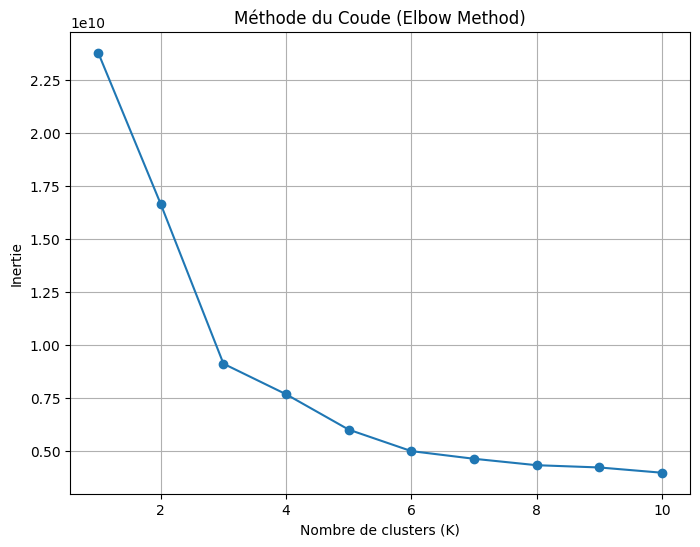

In [ ]:


# Définir la plage de K à tester (par exemple, de 1 à 10)
k_range = range(1, 11)
inertie = []

# Calculer l'inertie pour chaque valeur de K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # X est votre jeu de données
    inertie.append(kmeans.inertia_)

# Visualiser le graphique de la méthode du coude
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertie, marker='o')
plt.title("Méthode du Coude (Elbow Method)")
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()


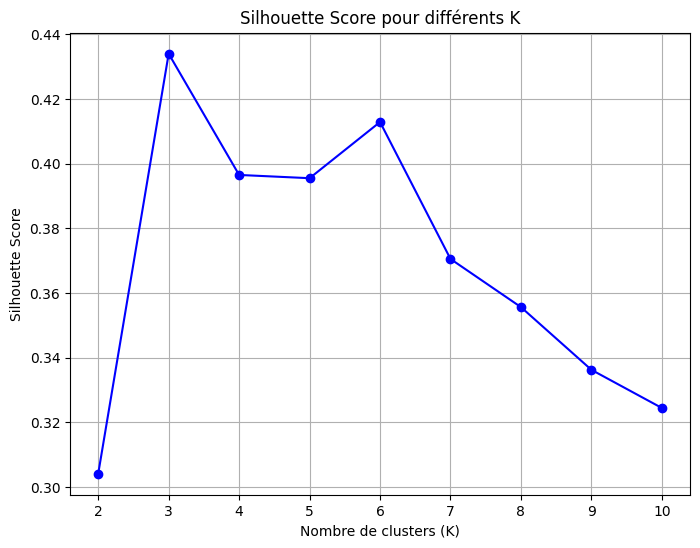

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

silhouette_scores = []

# Tester pour différentes valeurs de K (en commençant à partir de 2)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # X est votre jeu de données
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Visualiser les scores de silhouette pour chaque valeur de K
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='blue')
plt.title("Silhouette Score pour différents K")
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


# *KMEANS*

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Appliquer KMeans pour K=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)  # X est votre jeu de données normalisé et sans valeurs manquantes


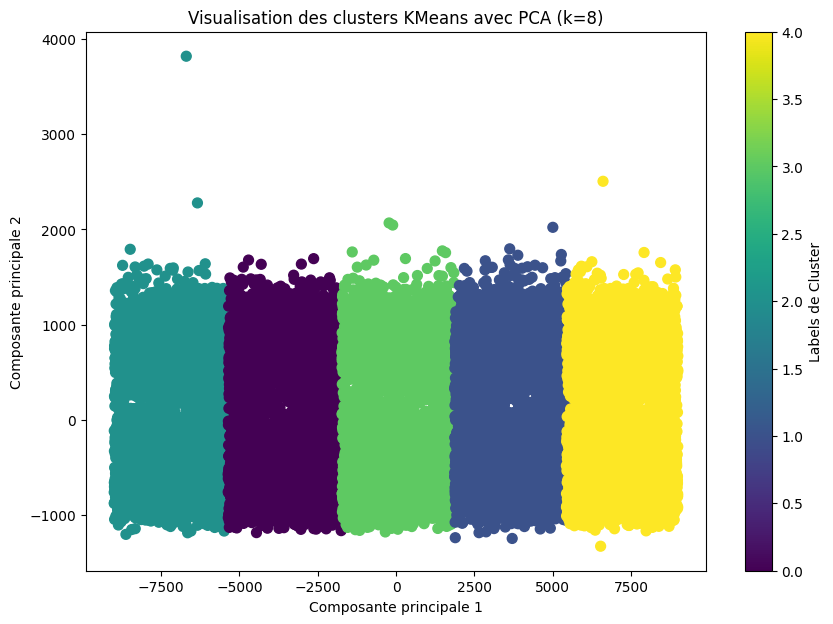

In [ ]:
# Ajouter les labels au DataFrame X
X['KMeans_Labels'] = kmeans_labels

# Réduire les dimensions à 2D avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.drop(columns=['KMeans_Labels']))

# Visualisation des clusters dans l'espace PCA
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['KMeans_Labels'], cmap='viridis', s=50)
plt.title("Visualisation des clusters KMeans avec PCA (k=3)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(label='Labels de Cluster')
plt.show()



In [ ]:
from sklearn.covariance import EllipticEnvelope
outlier_detector = EllipticEnvelope()
outlier_detector.fit(X_pca)
#print(x)
print(outlier_detector.predict(X_pca))

[ 1 -1  1 ...  1  1  1]


# CAH

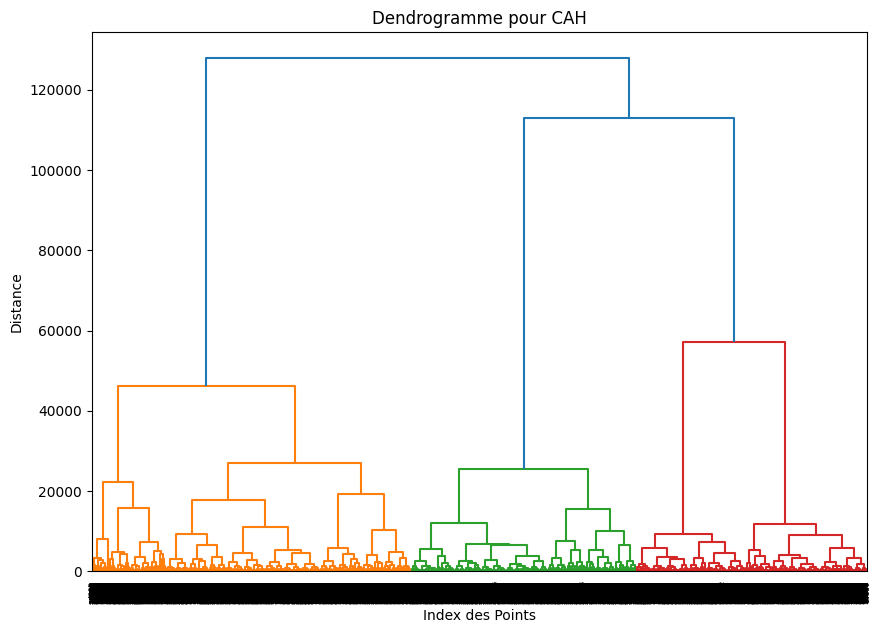

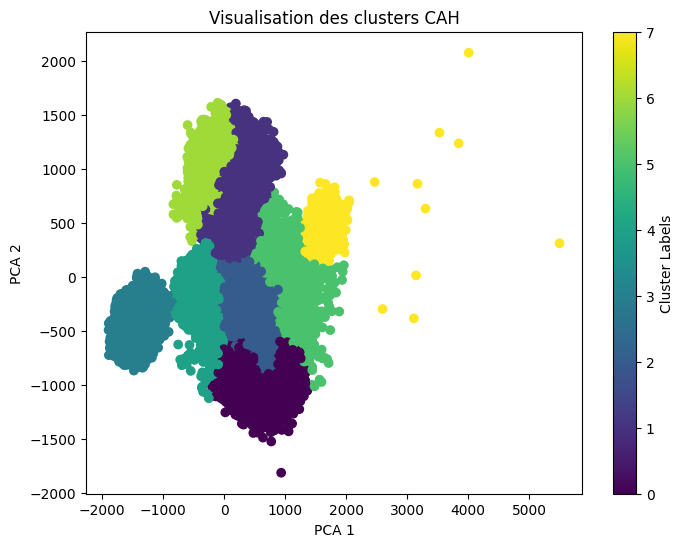

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import numpy as np

# Réduction des dimensions à 2D avec PCA pour la visualisation (si nécessaire)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisation du dendrogramme pour le CAH
linked = linkage(X_pca, method='ward')  # Utilisation de X_pca pour réduire la complexité du graphe
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogramme pour CAH")
plt.xlabel("Index des Points")
plt.ylabel("Distance")
plt.show()

# Application du CAH
ca_cluster = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
ca_labels = ca_cluster.fit_predict(X_pca)  # Utilisation des données réduites avec PCA



# Visualisation des clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ca_labels, cmap='viridis', label="Clusters CAH")
plt.title("Visualisation des clusters CAH")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster Labels")
plt.show()


*DBSCAN*

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Appliquer DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajustez les paramètres si nécessaire
dbscan_labels = dbscan.fit_predict(X)



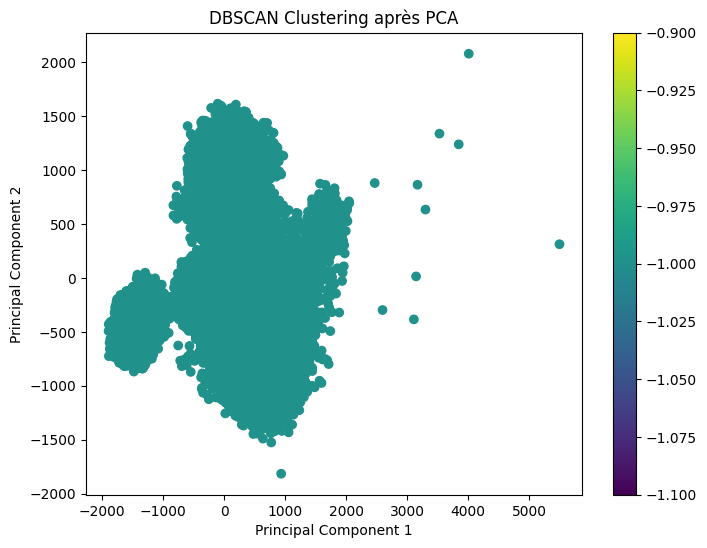

In [ ]:
# Importation des bibliothèques nécessaires
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Supposons que `X` soit votre dataset après nettoyage, encodage, etc.

# Appliquer PCA pour réduire la dimensionnalité à 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # X est votre jeu de données

# Appliquer DBSCAN sur les données PCA réduites
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

# Visualisation du clustering DBSCAN avec PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering après PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# KMeans
kmeans_silhouette = silhouette_score(X_pca, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(X_pca, kmeans_labels)
kmeans_inertia = kmeans.inertia_

# CAH
cah_silhouette = silhouette_score(X_pca, ca_labels)
cah_davies_bouldin = davies_bouldin_score(X_pca, ca_labels)

# DBSCAN
if len(set(dbscan_labels)) > 1:  # Vérifie qu'il y a au moins 2 clusters
    dbscan_silhouette = silhouette_score(X_pca, dbscan_labels)
    dbscan_davies_bouldin = davies_bouldin_score(X_pca, dbscan_labels)
else:
    dbscan_silhouette = -1  # Indique qu'il n'est pas possible de calculer la métrique
    dbscan_davies_bouldin = -1

print("KMeans Metrics:")
print(f"Silhouette Score: {kmeans_silhouette}")
print(f"Davies-Bouldin Score: {kmeans_davies_bouldin}")
print(f"Inertia: {kmeans_inertia}")

print("\nCAH Metrics:")
print(f"Silhouette Score: {cah_silhouette}")

print("\nDBSCAN Metrics:")
print(f"Silhouette Score: {dbscan_silhouette}")
print(f"Davies-Bouldin Score: {dbscan_davies_bouldin}")


KMeans Metrics:
Silhouette Score: 0.5495204649011558
Davies-Bouldin Score: 0.6499366951179526
Inertia: 9126504297.267593

DBSCAN Metrics:
Silhouette Score: -1
Davies-Bouldin Score: -1


***2-Prevision Average Balance ***

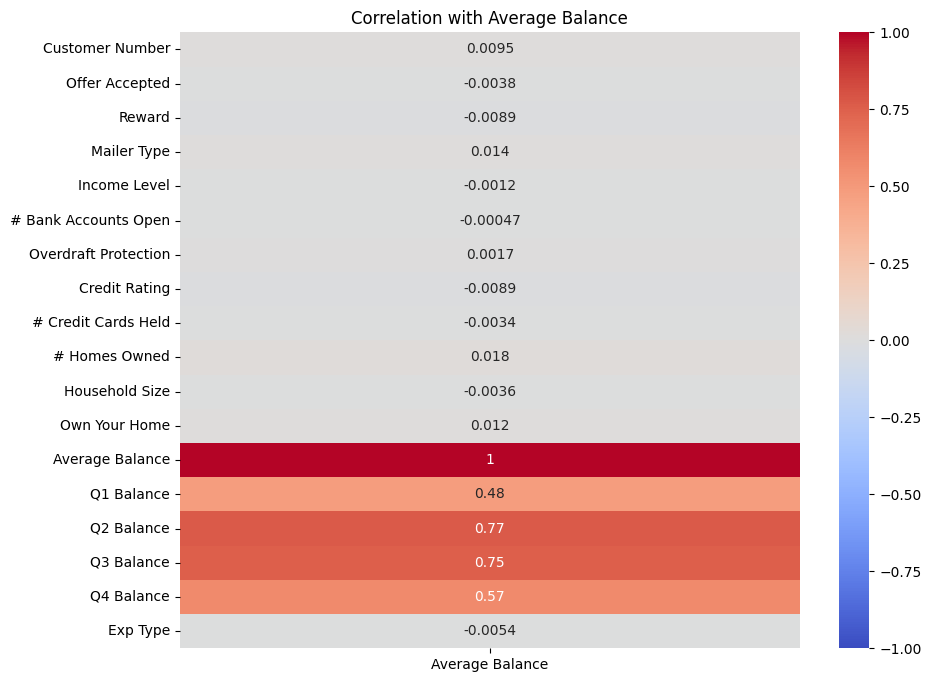

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
correlation_matrix = data.corr()

# Visualisation de la corrélation avec Average Balance
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Average Balance']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation with Average Balance")
plt.show()


Importance des caractéristiques :
                 Feature  Importance
14            Q3 Balance    0.699490
12            Q1 Balance    0.174194
15            Q4 Balance    0.077671
13            Q2 Balance    0.044583
0        Customer Number    0.000902
16              Exp Type    0.000894
10        Household Size    0.000347
8    # Credit Cards Held    0.000283
2                 Reward    0.000255
4           Income Level    0.000235
7          Credit Rating    0.000230
5   # Bank Accounts Open    0.000224
3            Mailer Type    0.000220
9          # Homes Owned    0.000195
11         Own Your Home    0.000136
6   Overdraft Protection    0.000099
1         Offer Accepted    0.000041

Performance du modèle :
Mean Absolute Error (MAE): 57.91829713981003
Mean Squared Error (MSE): 5471.958780542556
Root Mean Squared Error (RMSE): 73.97268942347951
R2 Score: 0.9547432606893673


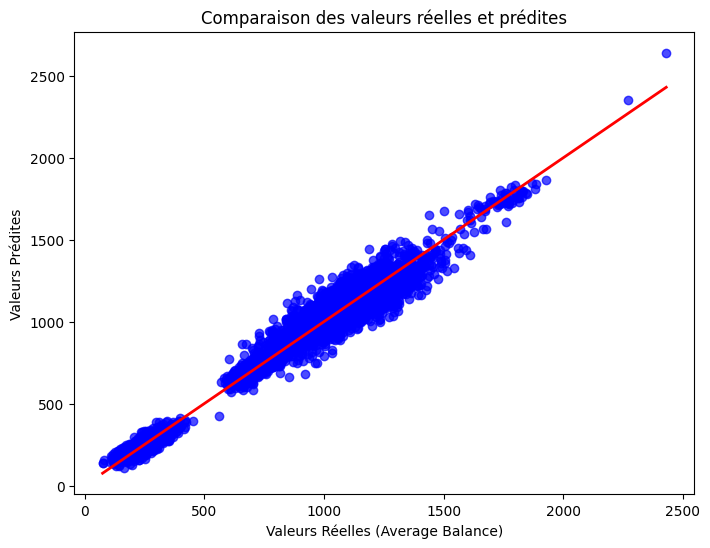

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np  # Nécessaire pour sqrt

# Étape 1 : Charger les données et définir X et y
X = data.drop(columns=['Average Balance'])  # Supprime la colonne cible des caractéristiques
y = data['Average Balance']                 # Variable cible

# Étape 2 : Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 3 : Appliquer Random Forest pour déterminer l'importance des caractéristiques
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Obtenir l'importance des caractéristiques
feature_importances = rf_model.feature_importances_

# Créer un DataFrame pour afficher les importances
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher les caractéristiques triées par importance
print("Importance des caractéristiques :")
print(importance_df)

# Étape 4 : Sélection des meilleures caractéristiques
# Par exemple, on conserve les caractéristiques ayant une importance > 0.05
selected_features = importance_df[importance_df['Importance'] > 0.05]['Feature'].tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Étape 5 : Réentraîner le modèle Random Forest avec les meilleures caractéristiques
rf_selected_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selected_model.fit(X_train_selected, y_train)

# Étape 6 : Prédire et évaluer les performances du modèle
y_pred = rf_selected_model.predict(X_test_selected)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nPerformance du modèle :")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

# Étape 7 : Visualiser les résultats
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', lw=2)
plt.xlabel("Valeurs Réelles (Average Balance)")
plt.ylabel("Valeurs Prédites")
plt.title("Comparaison des valeurs réelles et prédites")
plt.show()


Mean Absolute Error (MAE) : Mesure la moyenne des erreurs absolues entre les valeurs observées et les valeurs prédites. Plus faible est la valeur, meilleure est la prédiction.

Mean Squared Error (MSE) : Mesure la moyenne des carrés des erreurs entre les valeurs observées et les valeurs prédites. Plus faible est la valeur, meilleure est la prédiction.

Root Mean Squared Error (RMSE) : C'est la racine carrée du MSE, ce qui permet de garder l'unité d'origine du variable cible.

R-squared (R²) : Indicateur qui mesure la proportion de variance de la variable cible expliquée par le modèle. Un score R² proche de 1 indique une bonne qualité de prédiction.#

# ***XGBOOST***

In [ ]:
# !pip install xgboost

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:54:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Importance des caractéristiques :
                 Feature  Importance
14            Q3 Balance    0.696794
12            Q1 Balance    0.160232
15            Q4 Balance    0.078287
13            Q2 Balance    0.055893
4           Income Level    0.001641
0        Customer Number    0.000736
16              Exp Type    0.000726
8    # Credit Cards Held    0.000718
10        Household Size    0.000662
7          Credit Rating    0.000655
5   # Bank Accounts Open    0.000629
6   Overdraft Protection    0.000625
3            Mailer Type    0.000624
1         Offer Accepted    0.000536
9          # Homes Owned    0.000528
11         Own Your Home    0.000404
2                 Reward    0.000309


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:54:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Performance du modèle :
Mean Absolute Error (MAE): 57.91829713981003
Mean Squared Error (MSE) : 933.0850418295539
Root Mean Squared Error (RMSE): 73.97268942347951
R2 Score : 0.9922827659735142


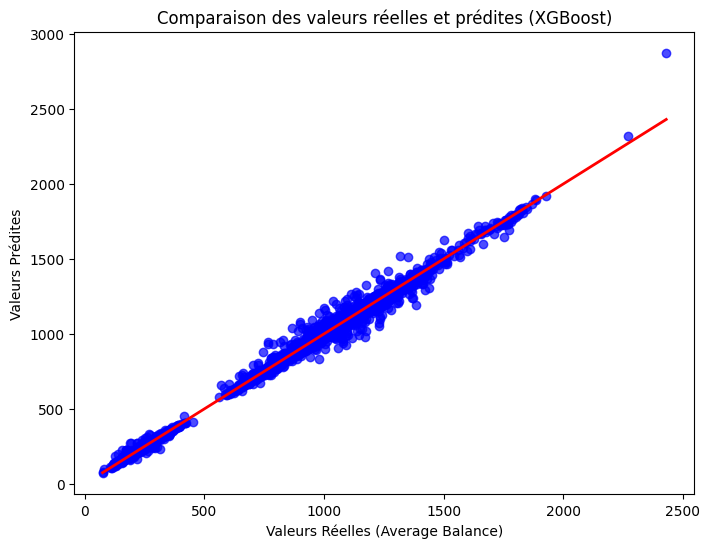

In [ ]:
# Étape 1 : Charger les données et définir X et y
X = data.drop(columns=['Average Balance'])  # Supprime la colonne cible des caractéristiques
y = data['Average Balance']                 # Variable cible

# Étape 2 : Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 3 : Appliquer XGBoost pour déterminer l'importance des caractéristiques
xgb_model = XGBRegressor(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='rmse')
xgb_model.fit(X_train, y_train)

# Obtenir l'importance des caractéristiques
feature_importances = xgb_model.feature_importances_

# Créer un DataFrame pour afficher les importances
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher les caractéristiques triées par importance
print("Importance des caractéristiques :")
print(importance_df)

# Étape 4 : Sélection des meilleures caractéristiques
# Par exemple, on conserve les caractéristiques ayant une importance > 0.05
selected_features = importance_df[importance_df['Importance'] > 0.05]['Feature'].tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Étape 5 : Réentraîner le modèle XGBoost avec les meilleures caractéristiques
xgb_selected_model = XGBRegressor(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='rmse')
xgb_selected_model.fit(X_train_selected, y_train)

# Étape 6 : Prédire et évaluer les performances du modèle
y_pred = xgb_selected_model.predict(X_test_selected)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nPerformance du modèle :")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE) : {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score : {r2}")

# Étape 7 : Visualiser les résultats
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', lw=2)
plt.xlabel("Valeurs Réelles (Average Balance)")
plt.ylabel("Valeurs Prédites")
plt.title("Comparaison des valeurs réelles et prédites (XGBoost)")
plt.show()


# ***adaboost***

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Sélection de K meilleures caractéristiques
selector = SelectKBest(score_func=f_regression, k='all')
X_selected = selector.fit_transform(X, y)

# Diviser les données en ensemble d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Modèle AdaBoost
adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)

# Prédictions
y_pred = adaboost_model.predict(X_test)

# Évaluer les performances du modèle
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Importance des caractéristiques :")
feature_importances = adaboost_model.feature_importances_
features = selector.get_feature_names_out()
for feature, importance in sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True):
    print(f"{feature:20} {importance:.6f}")

print("\nPerformance du modèle :")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")


Importance des caractéristiques :
Q4 Balance           0.365199
Q3 Balance           0.247968
Q2 Balance           0.193492
Q1 Balance           0.183165
# Homes Owned        0.004363
Income Level         0.003355
Reward               0.001862
Customer Number      0.000341
Exp Type             0.000188
Credit Rating        0.000067
Offer Accepted       0.000000
Mailer Type          0.000000
# Bank Accounts Open 0.000000
Overdraft Protection 0.000000
# Credit Cards Held  0.000000
Household Size       0.000000
Own Your Home        0.000000

Performance du modèle :
Mean Absolute Error (MAE): 63.5900242164963
Mean Squared Error (MSE): 6230.411044756229
Root Mean Squared Error (RMSE): 78.9329528445264
R2 Score: 0.9484703559074212


***Feacture Selection***

In [ ]:
import pandas as pd
from xgboost import XGBRegressor

# Étape 1 : Appliquer XGBoost pour déterminer l'importance des caractéristiques
def feature_selection(X_train, y_train, threshold=0.05, original_columns=None):
    # Entraînement du modèle XGBoost
    xgb_model = XGBRegressor(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='rmse')
    xgb_model.fit(X_train, y_train)

    # Obtenir l'importance des caractéristiques
    feature_importances = xgb_model.feature_importances_

    # Si X_train est un tableau NumPy, utiliser les colonnes d'origine
    if original_columns is None:
        raise ValueError("Les colonnes d'origine doivent être fournies si X_train est un tableau NumPy.")
    features = original_columns

    # Créer un DataFrame pour afficher les importances
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Sélectionner les caractéristiques dont l'importance est supérieure au seuil
    selected_features = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()

    # Trier les caractéristiques dans l'ordre souhaité
    sorted_selected_features = sorted(selected_features)

    # Afficher les caractéristiques sélectionnées triées
    print("Caractéristiques sélectionnées :")
    print(sorted_selected_features)

    return sorted_selected_features, importance_df

# Étape 2 : Appliquer la sélection des caractéristiques
def apply_feature_selection(X, selected_features):
    # Si X est un tableau NumPy, convertir en DataFrame avec les colonnes appropriées
    if isinstance(X, pd.DataFrame):
        X_selected = X[selected_features]
    else:
        X_selected = pd.DataFrame(X, columns=selected_features)
    return X_selected

# Exemple d'utilisation :
# Convertir X_train et X_test en DataFrame Pandas
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Appliquer la sélection des caractéristiques
selected_features, _ = feature_selection(X_train_df, y_train, threshold=0.05, original_columns=X.columns)

# Appliquer la sélection des caractéristiques sur les ensembles de données
X_train_selected = apply_feature_selection(X_train_df, selected_features)
X_test_selected = apply_feature_selection(X_test_df, selected_features)

# Optionnel : Afficher les données avec les caractéristiques sélectionnées
# print("\nDonnées d'entraînement avec les caractéristiques sélectionnées :")
# print(X_train_selected.head())


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:54:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Caractéristiques sélectionnées :
['Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance']


In [ ]:
import pickle
import pandas as pd
from xgboost import XGBRegressor

# Étape 1 : Appliquer XGBoost pour déterminer l'importance des caractéristiques
def feature_selection(X_train, y_train, threshold=0.05, original_columns=None):
    # Entraînement du modèle XGBoost
    xgb_model = XGBRegressor(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='rmse')
    xgb_model.fit(X_train, y_train)

    # Obtenir l'importance des caractéristiques
    feature_importances = xgb_model.feature_importances_

    # Si X_train est un tableau NumPy, utiliser les colonnes d'origine
    if original_columns is None:
        raise ValueError("Les colonnes d'origine doivent être fournies si X_train est un tableau NumPy.")
    features = original_columns

    # Créer un DataFrame pour afficher les importances
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Sélectionner les caractéristiques dont l'importance est supérieure au seuil
    selected_features = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()

    # Trier les caractéristiques dans l'ordre souhaité
    sorted_selected_features = sorted(selected_features)

    # Afficher les caractéristiques sélectionnées triées
    print("Caractéristiques sélectionnées :")
    print(sorted_selected_features)

    return sorted_selected_features, importance_df

# Étape 2 : Appliquer la sélection des caractéristiques
def apply_feature_selection(X, selected_features):
    # Si X est un tableau NumPy, convertir en DataFrame avec les colonnes appropriées
    if isinstance(X, pd.DataFrame):
        X_selected = X[selected_features]
    else:
        X_selected = pd.DataFrame(X, columns=selected_features)
    return X_selected

# Exemple d'utilisation :
# Assurez-vous que X_train et X_test sont des DataFrames Pandas
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Appliquer la sélection des caractéristiques
selected_features, _ = feature_selection(X_train_df, y_train, threshold=0.05, original_columns=X.columns)

# Appliquer la sélection des caractéristiques sur les ensembles de données
X_train_selected = apply_feature_selection(X_train_df, selected_features)
X_test_selected = apply_feature_selection(X_test_df, selected_features)

# Réentraîner le modèle avec les caractéristiques sélectionnées
xgb_model = XGBRegressor(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='rmse')
xgb_model.fit(X_train_selected, y_train)

# Sauvegarder le modèle XGBoost avec les caractéristiques sélectionnées
with open("xgboost_model_selected_features.pkl", "wb") as file:
    pickle.dump(xgb_model, file)

print("Modèle sauvegardé avec succès dans 'xgboost_model_selected_features.pkl'.")

# Enregistrer les ensembles de données sélectionnées dans des fichiers CSV ou pickle
X_train_selected.to_csv("X_train_selected.csv", index=False)
X_test_selected.to_csv("X_test_selected.csv", index=False)

# Optionnel : Sauvegarder en pickle
with open("X_train_selected.pkl", "wb") as f:
    pickle.dump(X_train_selected, f)

with open("X_test_selected.pkl", "wb") as f:
    pickle.dump(X_test_selected, f)

print("Données sélectionnées sauvegardées avec succès.")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:54:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Caractéristiques sélectionnées :
['Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance']


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:54:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Modèle sauvegardé avec succès dans 'xgboost_model_selected_features.pkl'.
Données sélectionnées sauvegardées avec succès.


In [ ]:
pip install flask-cors


In [ ]:
pip install pyngrok


In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS  # Importer Flask-CORS
from pyngrok import ngrok
import pickle
import numpy as np

# Configurer l'authtoken pour ngrok
ngrok.set_auth_token("2pzZdmWELMZbtdE8eli3UuaMvYt_xMW4o6PiJx251bo66qBq")

# Ouvrir un tunnel sur le port 5000
public_url = ngrok.connect(5000)
print(f"Flask app is live at {public_url}")

app = Flask(__name__)

# Autoriser toutes les origines pour toutes les routes
CORS(app)

# Charger le modèle XGBoost
with open("xgboost_model_selected_features.pkl", "rb") as file:
    model = pickle.load(file)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Récupérer les données JSON envoyées par Angular
        data = request.json

        # Extraction des valeurs des features
        features = np.array([[data['q1Balance'], data['q2Balance'], data['q3Balance'], data['q4Balance']]])

        # Effectuer la prédiction
        prediction = model.predict(features)

        # Retourner le résultat sous forme de JSON
        return jsonify({'predictedAverageBalance': float(prediction[0])})
    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


Flask app is live at NgrokTunnel: "https://ec74-34-74-215-122.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [14/Dec/2024 15:15:53] "OPTIONS /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Dec/2024 15:15:54] "POST /predict HTTP/1.1" 200 -
